<a href="https://colab.research.google.com/github/KhushbooGupta2111/Data-Analysis-With-Automotive-Industry-Engage/blob/main/Customer_Segment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dabl

Importing required libraries 

In [ ]:
#for dataframe manipulations 
import numpy as np 
#for mathematical operation
import pandas as pd  
#for Data Visualisation     
import matplotlib.pyplot as plt   
import seaborn as sns 
plt.style.use('fivethirtyeight')
#for data analytics
import dabl                       

Importing Dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Reading Dataset

In [ ]:
auto_data = pd.read_csv('gdrive/My Drive/Indian automoble buying behavour study 1.0.csv')

Examining Dataset

In [ ]:
print("Shape of dataset :", auto_data.shape)

Shape of dataset : (99, 13)


In [ ]:
auto_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


Data Cleaning

In [ ]:
auto_data = auto_data.drop("Wife Working", axis = 1)

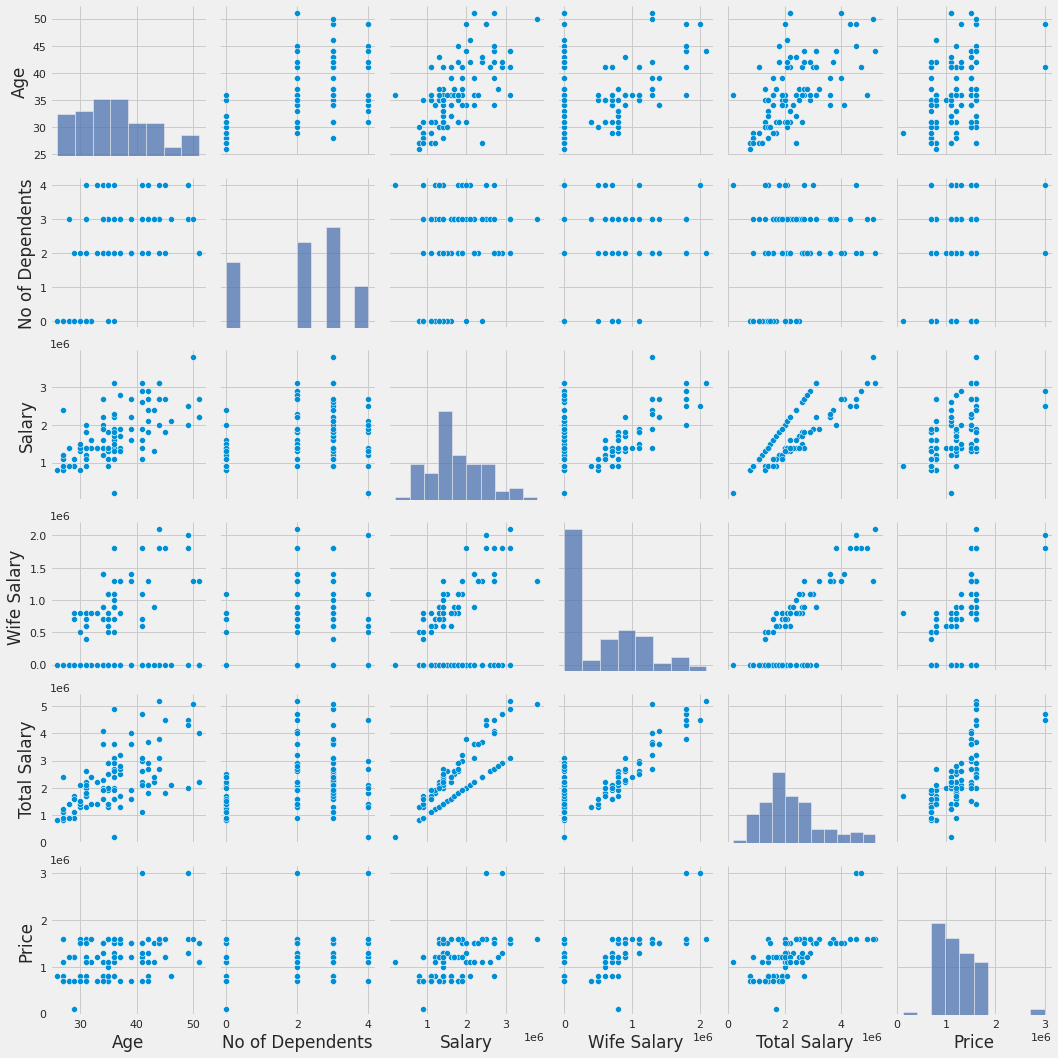

In [ ]:
sns.pairplot(auto_data)
plt.show()

Text(0.5, 1.0, 'Correlation  Heatmap of the data')

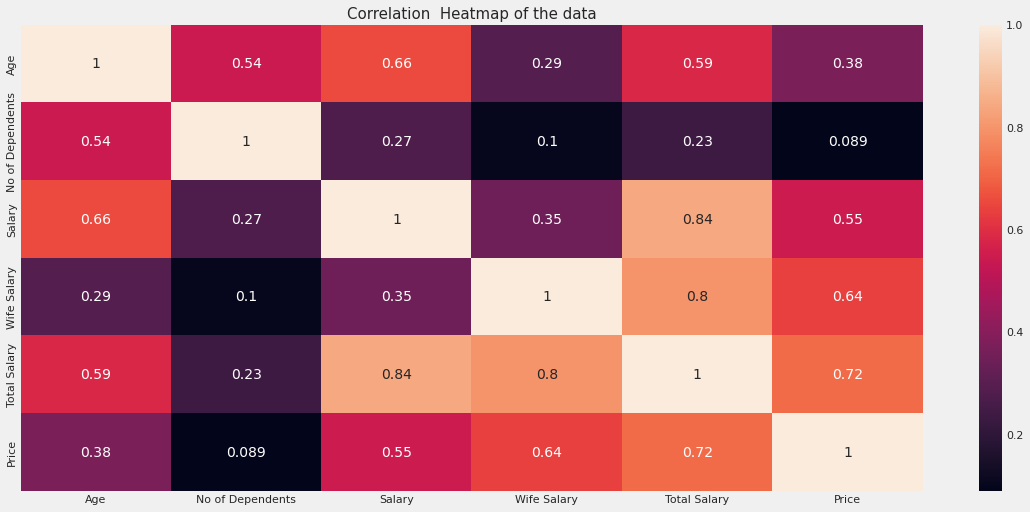

In [ ]:
sns.heatmap(auto_data.corr(), annot = True)
plt.title("Correlation  Heatmap of the data", fontsize = 15)

Target looks like classification


[[<Figure size 216x216 with 2 Axes>], None]

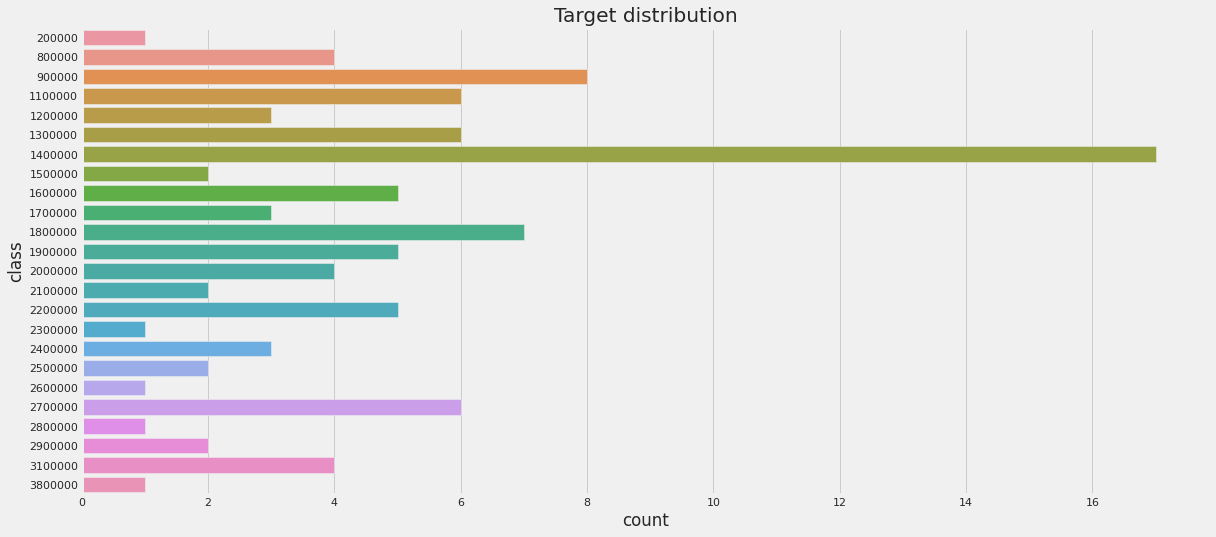

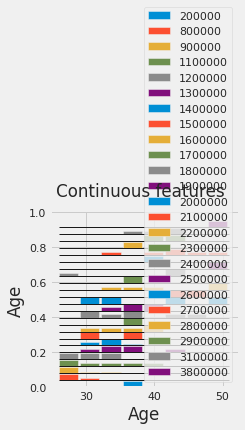

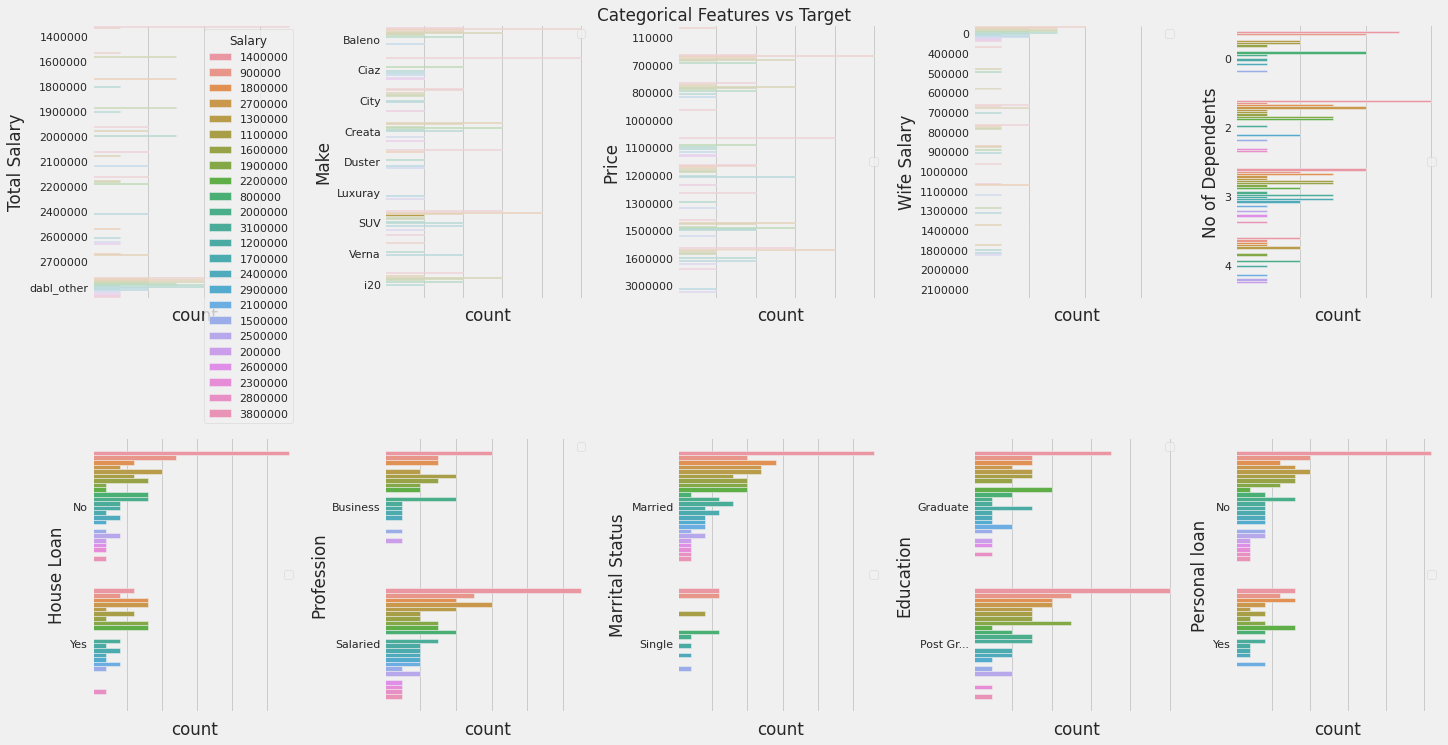

In [ ]:
dabl.plot(auto_data,target_col = "Salary")

Data Cleaning

In [ ]:
auto_data.isnull().any().any()

False

In [ ]:
# This function is used to eliminate the delimiter values in the columns
def unit_delimiter(column_name , removing_substring):
  auto_data[column_name] = auto_data[column_name].apply(str).str.replace(' ' + removing_substring , '');

Function Built for converting values from string to integer 🌻

(Note: Run this after you have executed the function unit_delimiter)

In [ ]:
def string_to_numeric(column_name):
  auto_data[column_name] = auto_data[column_name].fillna(0)
  auto_data[column_name] = auto_data[column_name].replace("nan" , 0 , regex = True)
  auto_data[column_name] = pd.to_numeric(auto_data[column_name] )

Data Visualization

In [ ]:
# auto_data.drop(auto_data.loc[auto_data['Make']== 'i20'].index, inplace=True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18,8)
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.lineplot(auto_data['Make'])
plt.title('Distribution of Make', fontsize = 30)
plt.xlabel('Car names')
plt.ylabel('No of cars sold')





```
# This is formatted as code
```

No of dependents 
# This tells us about the

In [ ]:
car = auto_data["No of Dependents"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['Company', 'Amount'])
car_dataframe.groupby(['Company']).sum().plot(kind='pie', y='Amount' , legend=None , autopct='%1.1f%%')
print(car)

In [ ]:
auto_data["Make"].value_counts()

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

<BarContainer object of 9 artists>

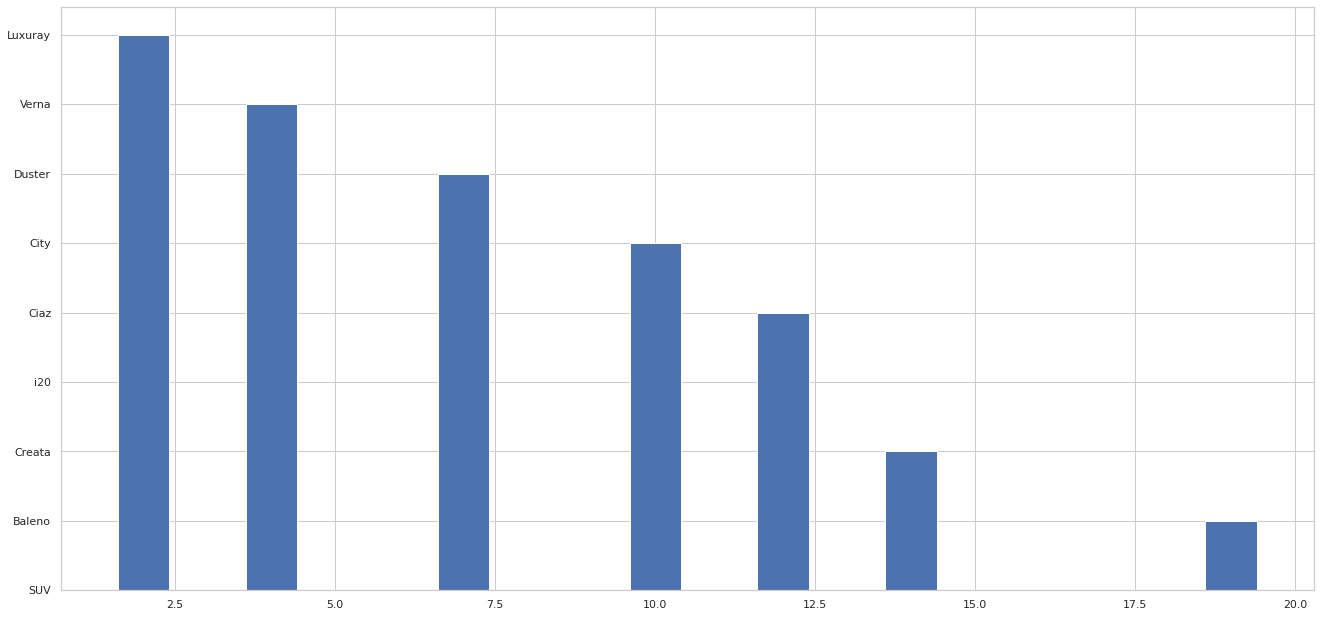

In [ ]:
car_Name = auto_data.Make.value_counts().to_dict().values()
count = auto_data.Make.value_counts().to_dict().keys()
fig = plt.figure(figsize =(20,10))
plt.bar(car_Name,count)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff802728710>,
      dtype=object)

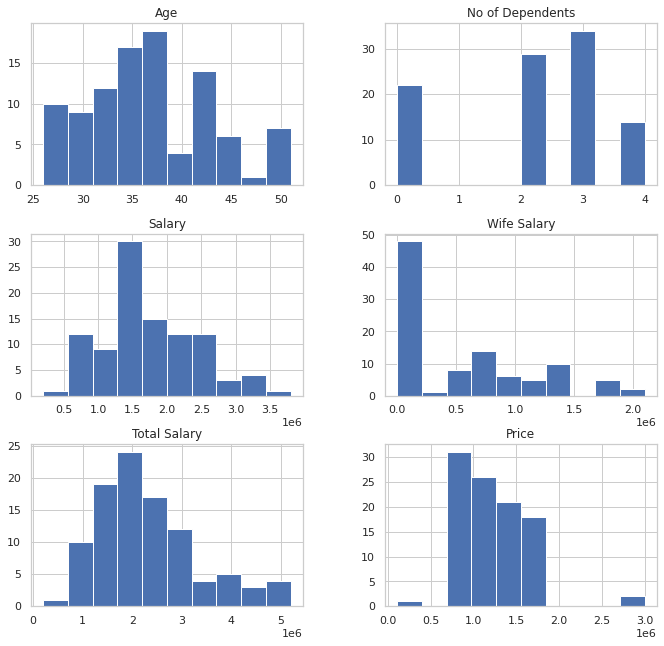

In [ ]:
auto_data.hist(figsize=(10,10) , align = 'mid')


In [ ]:
auto_data.plot(x = 'Make',
            y = ['Total Salary','Salary', 'Wife Salary'] ,
            kind = 'line',
)

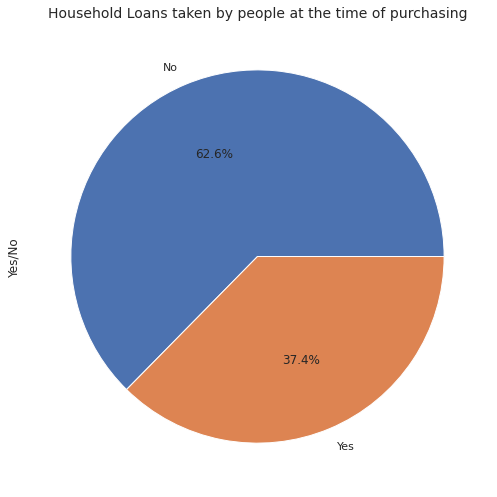

In [ ]:
car = auto_data["House Loan"].value_counts().to_dict()
car_dataframe = pd.DataFrame(car.items(), columns=['House', 'Yes/No'])
car_dataframe.groupby(['House']).sum().plot(kind='pie', y='Yes/No' , legend=None , autopct='%1.1f%%',)
plt.title("Household Loans taken by people at the time of purchasing", fontsize=14);


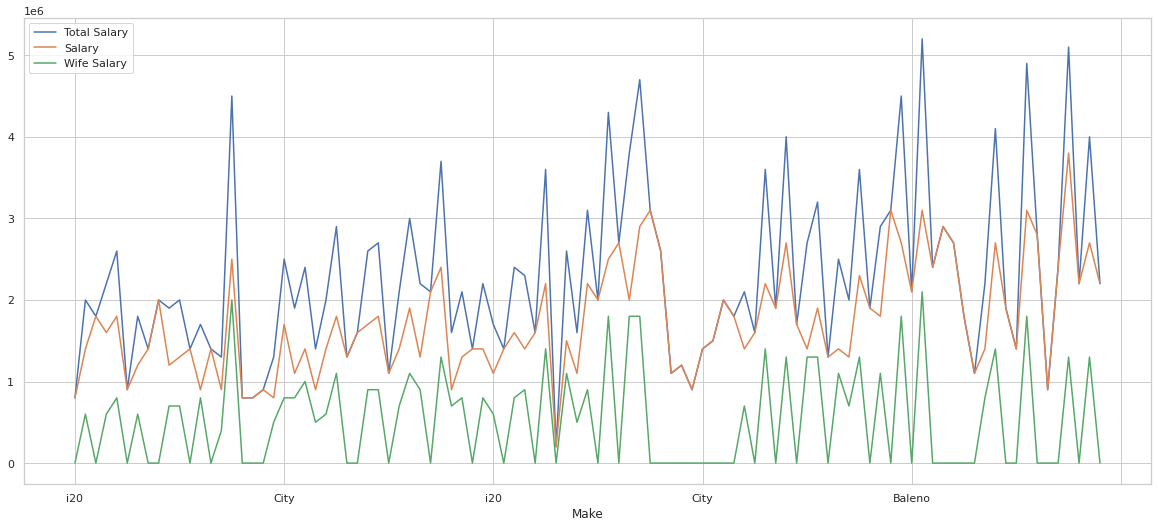

In [ ]:
auto_data.plot(x = 'Make',
            y = ['Total Salary','Salary', 'Wife Salary'] ,
            kind = 'line',
)